# Importing required libraries 


In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense 
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix, confusion_matrix,accuracy_score, ConfusionMatrixDisplay

**Importing Data**

In [2]:
train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv' )

# Converting data into tensors and labeling it according to the dataset documantation 

In [3]:
train_labels = np.array(train.label)
test_labels = np.array(test.label)

train.drop(['label'],axis =1 , inplace=True)
test.drop(['label'], axis = 1 , inplace= True)
train_data = np.array(train).reshape(train.shape[0],28,28)
test_data = np.array(test).reshape(test.shape[0],28,28)

labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

## Ploting randomly generated indexed images from the data

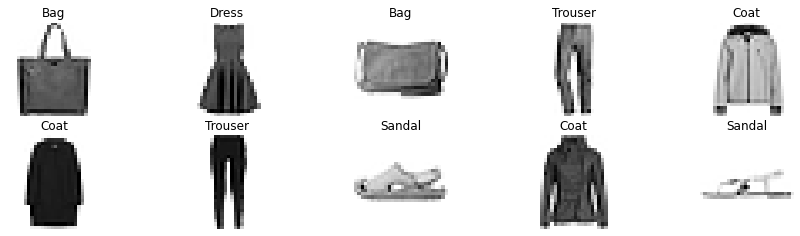

In [4]:
plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    index = np.random.randint(0,60000)
    plt.imshow(train_data[index],cmap='Greys')
    plt.title(labels[train_labels[index]])
    plt.axis(False)

In [5]:
# Normalizing the values 
train_data=train_data/255
test_data= test_data/255

# Building a Multi-class classification model through TensorFlow
**Some things to rememebr:**
* Input shape = 28 x 28
* Output shape = 10
* Loss function = SparseCathegoricalCrosstentropy
* Output layer function = Softmax

In [6]:
tf.random.set_seed(47) # setting random seed 

model = Sequential() # ceating the model 
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(Dense(100,activation='relu')) # any range for number of neurons between 5 to 10 is good, my model is overkill
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))
model.add(Dense(10,activation='Softmax',name= "Output_layer"))

model.compile(loss='sparse_categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])


2022-05-04 11:22:50.504552: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
Output_layer (Dense)         (None, 10)                260       
Total params: 85,085
Trainable params: 85,085
Non-trainable params: 0
_________________________________________________________________


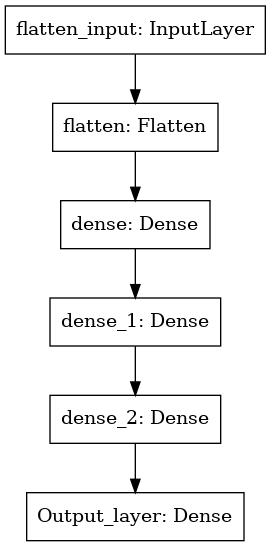

In [8]:
tf.keras.utils.plot_model(model)

In [9]:
#fitting model / Training our modell
history = model.fit(train_data,train_labels, validation_data=(test_data,test_labels), epochs=15)

2022-05-04 11:22:52.199801: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5235 - accuracy: 0.8116 - val_loss: 0.4188 - val_accuracy: 0.8378
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3805 - accuracy: 0.8621 - val_loss: 0.3729 - val_accuracy: 0.8652
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3449 - accuracy: 0.8750 - val_loss: 0.3479 - val_accuracy: 0.8722
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3212 - accuracy: 0.8818 - val_loss: 0.3716 - val_accuracy: 0.8631
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3046 - accuracy: 0.8878 - val_loss: 0.3705 - val_accuracy: 0.8649
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2899 - accuracy: 0.8926 - val_loss: 0.3623 - val_accuracy: 0.8678
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2798 - accuracy: 0.8962 - val_loss: 0.3092 - val_accuracy:

<AxesSubplot:>

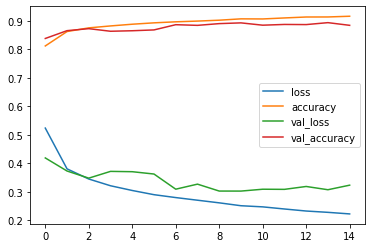

In [10]:
# Visualizing loss and accuracy of our model
pd.DataFrame(history.history).plot()

# Predictiong and Valadating our model

In [11]:
pred = model.predict(test_data) # inputs probability for each label
pred = pred.argmax(axis=1) # takes the label value with highest probability 

In [12]:
accuracy =accuracy_score(pred,test_labels)
print("Accuracy: ",accuracy*100,'%')

Accuracy:  88.39 %


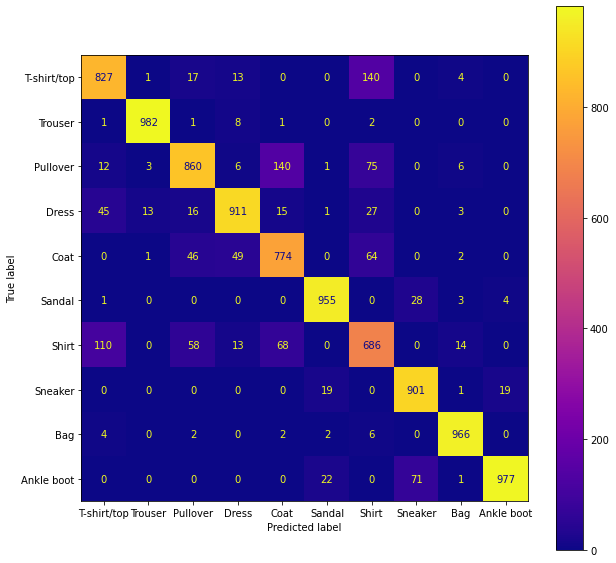

In [13]:
# Creating Confusion matrix
cm=confusion_matrix(pred ,test_labels)
# Ploting Confusion matrix 
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
fig,ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax, cmap = 'plasma');

# Visualizing Pictures with their predicted labels 

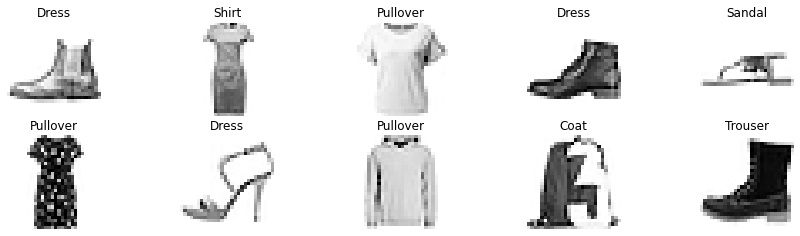

In [14]:
plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    index = np.random.randint(0,1000)
    plt.imshow(train_data[index],cmap='Greys')
    plt.title(labels[pred[index]])
    plt.axis(False)